# Introducción

El análisis de sentimiento consiste en la identificación de emociones a partir de una serie de datos de distinta naturaleza, para llevar a cabo este propósito puede apoyarse en distintas técnicas de Inteligencia Artificial (IA) que permiten captar patrones en los datos de entrada que conducen a la identificación de sentimientos.

Las redes sociales constituyen un campo óptimo de aplicación para esta rama de investigación, en múltiples ocasiones los usuarios de redes sociales publican contenido que revela con mayor o menor claridad las emociones que están sintiendo.

Resulta particularmente importante la identificación de sentimientos asociados a una mala salud mental, como pueden ser ansiedad, depresión o tendencias suicidas, puesto que permiten encontrar que usuarios pueden estar sufriendo problemas de esta índole únicamente a partir del contenido que suben a redes sociales, de cara a ayudarles a ser conscientes de lo que padecen o notificar a su círculo cercano para prevenir problemas mayores.

En este notebook se realizará un caso de estudio referente a la identificación de problemas de salud mental, en base a posts publicados en Twitter, para ello se apoyará en distintas técnicas de preprocesamiento de la información y en algoritmos de IA de diversa naturaleza, con el objetivo de evaluar su rendimiento y encontrar la opción con mejor desempeño.



# Ingesta

En primer lugar se lleva a cabo la ingesta del conjunto de datos de partida, esta base de datos se trata de una colección de tweets en la que para cada entrada se almacena el contenido del post y diversos parámetros del mismo.

Para realizar la ingesta se descarga el dataset de un repositorio de google drive mediante un enlace público, una vez instalado en el entorno del notebook se carga todo su contenido en una estructura de información de tipo dataframe, consistente en una matriz de datos, mediante la librería Pandas.

In [ ]:
# Se descarga el conjunto de datos
!wget "https://drive.google.com/uc?export=download&id=1x11njjBeyVp1LhBVcjdPMe9qhsjXLGaM" -O 'dataset.csv'

# Se importa pandas y se construye un dataframe a partir del dataset descargado
import pandas as pd

dataframe = pd.read_csv('dataset.csv')

print(dataframe)

--2024-05-31 10:57:28--  https://drive.google.com/uc?export=download&id=1x11njjBeyVp1LhBVcjdPMe9qhsjXLGaM
Resolving drive.google.com (drive.google.com)... 74.125.196.100, 74.125.196.138, 74.125.196.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.196.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1x11njjBeyVp1LhBVcjdPMe9qhsjXLGaM&export=download [following]
--2024-05-31 10:57:28--  https://drive.usercontent.google.com/download?id=1x11njjBeyVp1LhBVcjdPMe9qhsjXLGaM&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.215.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3490757 (3.3M) [application/octet-stream]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]   3.33M  --.-KB/s 

# Análisis Exploratorio de Datos

El análisis exploratorio de datos (EDA) es una etapa vital en cualquier proceso de desarrollo de modelos de inteligencia artificial, puesto que antes de aplicar cualquier técnica es necesario conocer la naturaleza y distribución de los datos con los que se va a trabajar, para ello en esta sección se evaluarán diversos aspectos del dataframe creado.

## Dimensiones

La estructura dataframe consiste en una matriz de datos en la que las columnas son las variables a estudiar y las filas son las muestras de datos. En este caso se tiene un dataframe con unas dimensiones de 11 variables de estudio y 20000 entradas, lo cual nos da un resultado de 220000 datos.

In [ ]:
# Se accede a shape para obtener las dimensiones del dataframe
print("Shape:", dataframe.shape)

# Se accede a size para obtener el tamaño del dataframe
print("\nSize:", dataframe.size)

Shape: (20000, 11)

Size: 220000


## Muestra

En este punto es posible apreciar por primera vez una muestra de la información almacenada en el dataset, concretamente se exponen las 5 primeras entradas del conjunto de datos, con esto se obtiene un primer vistazo de las distintas variables y el tipo de contenido que almacenan.

In [ ]:
# Se ejecuta la función head para obtener una muestra del dataframe
print("Head:")
dataframe.head()

Head:


,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


## Variables

A continuación se expone el listado de variables del dataframe junto a una explicación de las mismas:

* Unnamed: 0: orden numérico de las filas
* post_id: identificador del post
* post_created: fecha de creación del post
* post_text: contenido del post
* user_id: identificador del usuario autor del post
* followers: número de seguidores del usuario
* friends: número de amigos del usuario
* favourites: número de me gustas del post
* statuses: número de visualizaciones
* retweets: número de republicaciones del post
* label: etiqueta que identifica la salud mental del usuario siendo sus valores 0 en caso de no tener problemas de salud mental y 1 si tiene problemas de salud mental

In [ ]:
# Se accede a columns para obtener el listado de columnas del dataframe
print("Columns:", dataframe.columns)

Columns: Index(['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id',
       'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label'],
      dtype='object')


## Tipos

El dataframe presenta tanto columnas numéricas como columnas categóricas, siendo la división entre estas:
* Numéricas: 'Unnamed: 0', 'post_id', 'user_id', 'followers', 'friends', 'favourites', 'statuses', 'retweets' y 'label'
* Categóricas: 'post_created' y 'post_text'

In [ ]:
# Se accede a dtypes para obtener el tipo de cada variable del dataframe
print("Data Types:")
dataframe.dtypes

Data Types:


Unnamed: 0       int64
post_id          int64
post_created    object
post_text       object
user_id          int64
followers        int64
friends          int64
favourites       int64
statuses         int64
retweets         int64
label            int64
dtype: object

## Estadísticas

En este punto se muestran diversas estadísticas sobre la distibución de los datos en las distintas variables del dataframe. Destacan aspectos como que el valor medio de label sea 0.5 exacto, dando a entender que habrá igual número de usuarios con problemas de salud mental (1) que sin salud mental (0) en el conjunto de datos.

In [ ]:
# Se ejecuta la función describe para obtener datos estadísticos de todas las columnas del dataframe
print("Summary Statistics for Numerical Columns:")
dataframe.describe()

Summary Statistics for Numerical Columns:


,Unnamed: 0,post_id,user_id,followers,friends,favourites,statuses,retweets,label
count,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000
mean,9999.500000,6.874728e+17,3.548623e+16,900.483950,782.428750,6398.235550,4.439442e+04,1437.927300,0.500000
std,5773.647028,1.708396e+17,1.606083e+17,1899.913961,1834.817945,8393.072914,1.407785e+05,15119.665118,0.500013
min,0.000000,3.555966e+09,1.472438e+07,0.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,4999.750000,5.931686e+17,3.242944e+08,177.000000,211.000000,243.000000,5.129000e+03,0.000000,0.000000
50%,9999.500000,7.637400e+17,1.052122e+09,476.000000,561.000000,2752.000000,1.325100e+04,0.000000,0.500000
75%,14999.250000,8.153124e+17,2.285923e+09,1197.000000,701.000000,8229.000000,5.289200e+04,1.000000,1.000000
max,19999.000000,8.194574e+17,7.631825e+17,28614.000000,28514.000000,39008.000000,1.063601e+06,839540.000000,1.000000


## Nulos

Los valores nulos son datos faltantes en cualquier fila o columna, la ausencia de datos puede suponer un problema en los algoritmos de IA a la hora de comprender las distribuciones de las variables, por tanto es necesario evaluar en este punto la presencia de valores nulos en el conjunto de datos. Como se puede apreciar en la ejecución no se encuentran valores nulos en ninguna de las columnas.

In [ ]:
# Se ejecuta la función isNull para obtener el número de valores nulos de cada columna del dataframe
print("Checking for Missing Values:")
dataframe.isnull().sum()

Checking for Missing Values:


Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

## Únicos

En este punto se observa el número de valores distintos que almacena cada variable, con ello es posible evaluar si alguna columna númerica se trata de una variable categórica en la que sus categorías son números, en caso de encontrar alguna variable numérica con un bajo número de valores distintos. En este caso label es la única columna que tiene un número de valores distintos bajo y por la tanto la única que realmente es categórica

In [ ]:
# Se ejecuta la función nunique para mostrar los valores únicos de cada variable del dataframe
print("List of Unique Values:")
print(dataframe.nunique())

List of Unique Values:
Unnamed: 0      20000
post_id         19881
post_created    19102
post_text       19488
user_id            72
followers          69
friends            70
favourites         66
statuses           71
retweets         1706
label               2
dtype: int64


## Boxplots

Los gráficos boxplots permiten apreciar la distribución de valores de las variables, en este punto se emplearán para identificar aquellas variables que presenten valores muy alejados del grueso de su distribución, estos valores alejados de la media se denominan outliers.

Las variables que presentan posibles outliers son: user_id, followers, friends, favourites, statuses y retweets. Un valor muy alejado en user_id no es muy informativo, pero encontrar valores altos en followers, friends, favourites, statuses y retweets implica que algunos de los posts almacenados se tratan de tweets con un alto grado de viralidad, posiblemente escritos por influencers.

Boxplot visualization


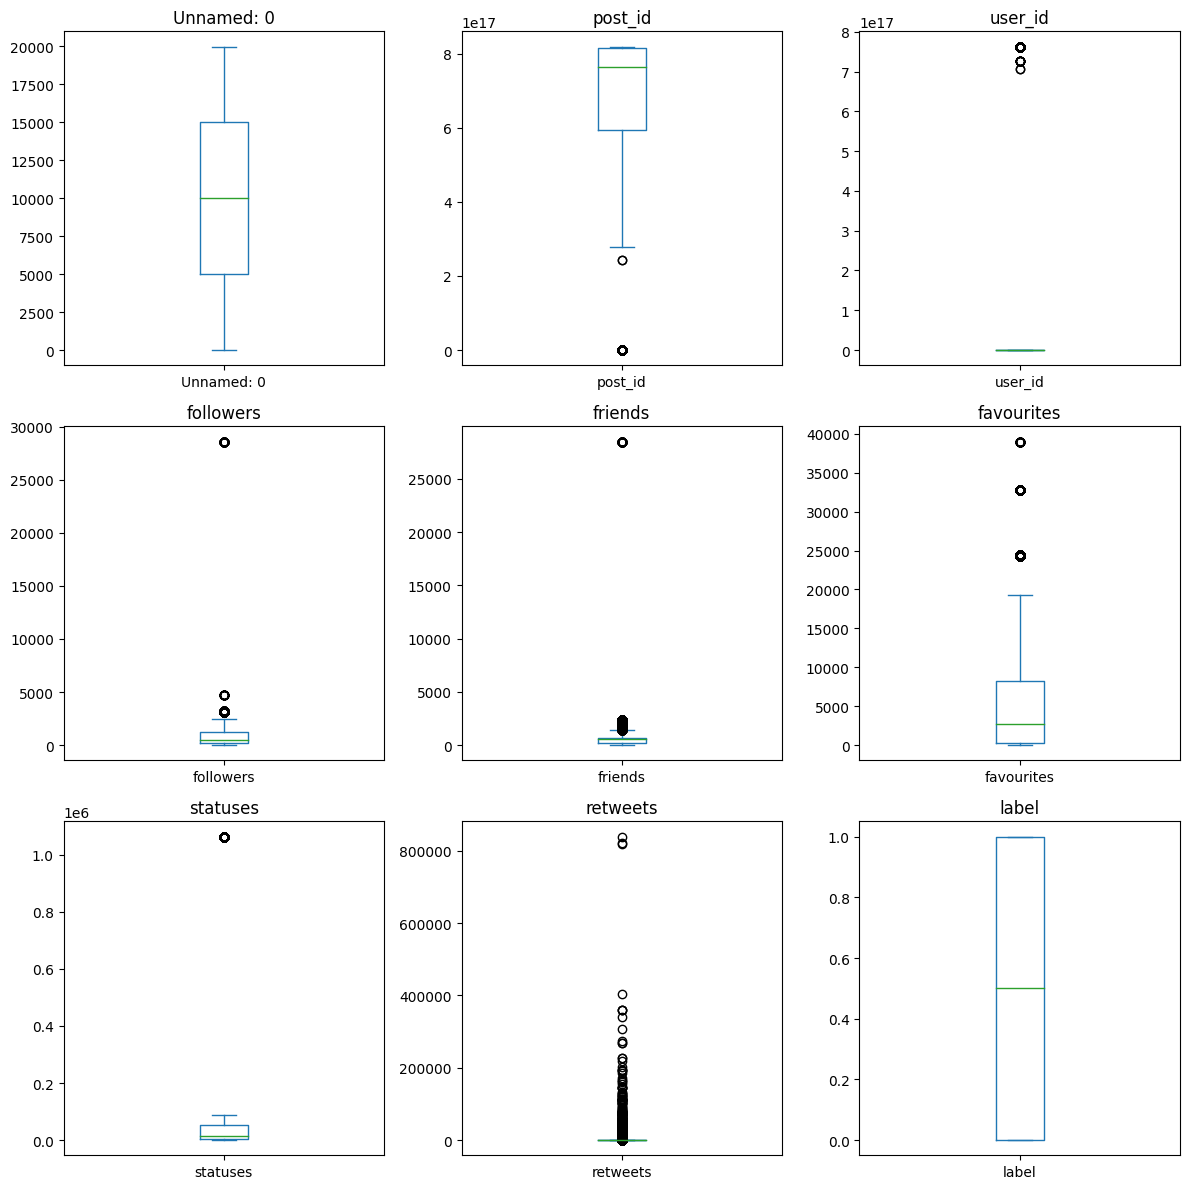

In [ ]:
import matplotlib.pyplot as plt
import math

# Se muestra un gráfico boxplot de cada variable del dataframe
print("Boxplot visualization")

num_cols = 3
numeric_variables = dataframe.select_dtypes(include=['float64', 'int64']).columns
num_rows = math.ceil(len(numeric_variables) / num_cols)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
variable_index = 0
for i in range(num_rows):
  for j in range(num_cols):
    if variable_index < len(numeric_variables):
      variable = numeric_variables[variable_index]
      dataframe[variable].plot(kind='box', ax=axs[i, j])
      axs[i, j].set_title(variable)
      variable_index += 1
    else:
      axs[i, j].axis('off')
plt.tight_layout()
plt.show()

## Histogramas

Los histogramas son un tipo de gráfica que permiten observar con mayor claridad la distribución de los datos de una variables. Para el dataset de partida se pueden extraer las siguientes conclusiones:

* Variables unnamed, user_id y post_id: al tratarse de identificadores no tiene una gran importancia centrarse en su distribución.
* Variables followers, friend, statuses y retweets: muestran como la inmensa mayoría de posts y sus creadores no tienen una gran repercusión en la red.
* Favourites: muestra una distribución mucho menos concentrada y más repartida que las variables del punto anterior, siendo más posible conseguir un número considerables de me gustas independientemente de los datos que se presenten en las variables anteriores.
* Label: se vuelve a recalcar que hay un reparto balanceado entre las dos posibles clases de la columna.

Histogram visualization with 10 bins


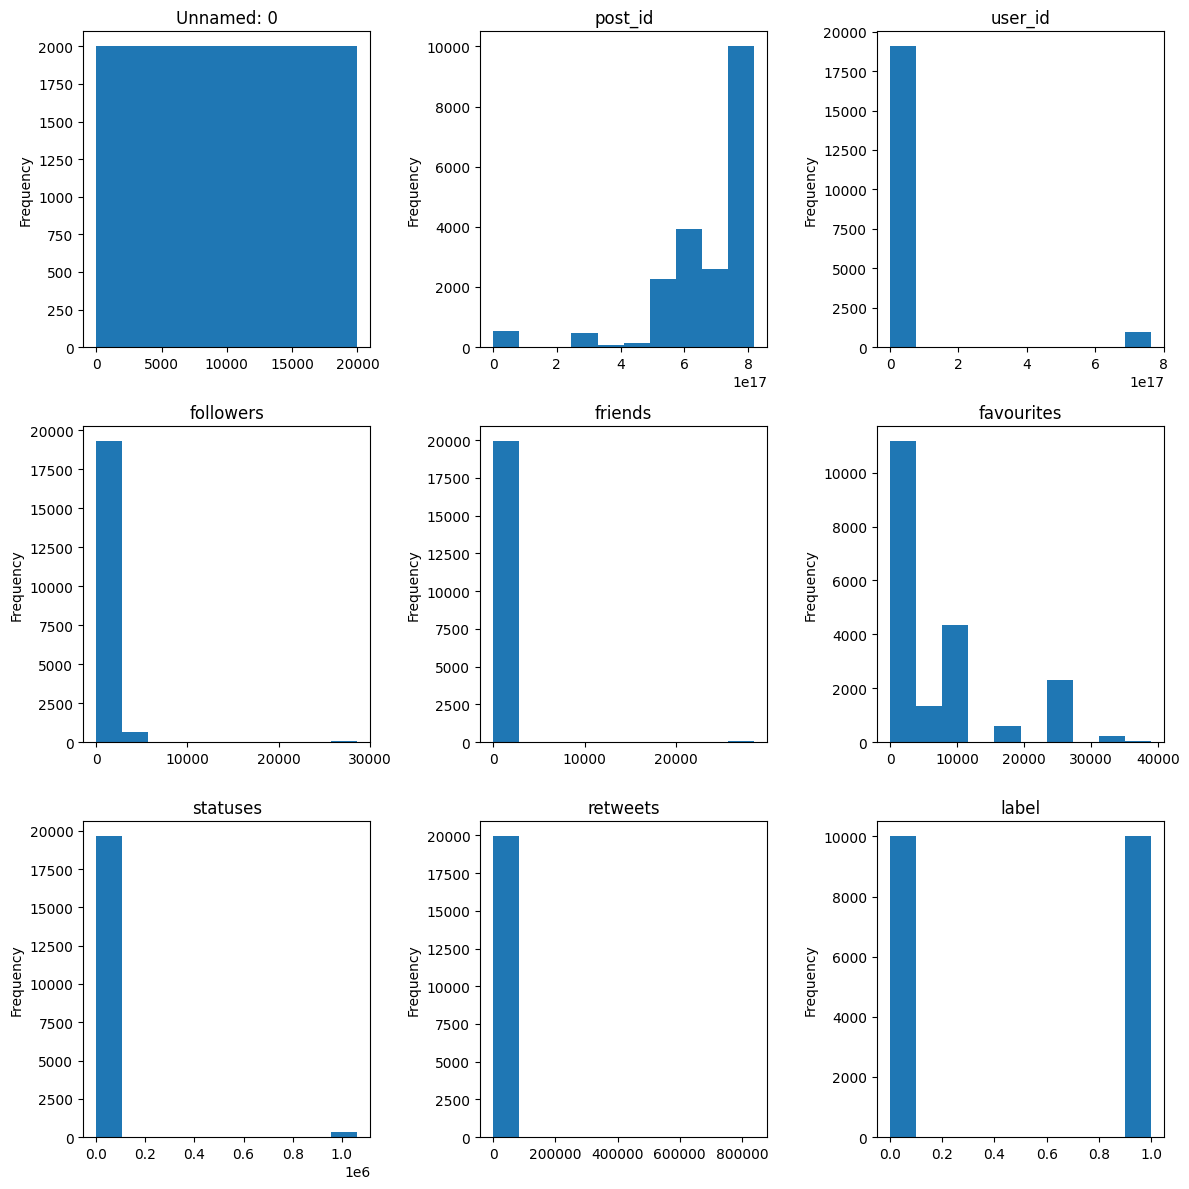

In [ ]:
import matplotlib.pyplot as plt
import math

# Se muestra un histograma de 10 bins para cada variable del dataframe
print("Histogram visualization with 10 bins")
nBins = 10
num_cols = 3
numeric_variables = dataframe.select_dtypes(include=['float64', 'int64']).columns
num_rows = math.ceil(len(numeric_variables) / num_cols)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
variable_index = 0
for i in range(num_rows):
  for j in range(num_cols):
    if variable_index < len(numeric_variables):
      variable = numeric_variables[variable_index]
      dataframe[variable].plot(kind='hist', bins=nBins, ax=axs[i, j])
      axs[i, j].set_title(variable)
      variable_index += 1
    else:
      axs[i, j].axis('off')
plt.tight_layout()
plt.show()

## Palabras con mayor frecuencia

La nube de palabras es una técnica de visualización de datos que muestra cuales son las palabras más repetidas en un conjunto de textos, para ello muestra las palabras más repetidas con un tamaño relativo a su frecuencia de aparición en el corpus. Al observar con sencillez las palabras de mayor tamaño, se pueden identificar rápidamente cuáles son los temas dominantes en el conjunto de datos, además de poder descubrir patrones en los datos textuales.

En el caso de estudio las palabras con mayor frecuencia de aparición son:

* https: esta palabra designa el comienzo de una url, por lo que dada su frecuencia habrá que eliminar las urls para que los algoritmos puedan centrarse en otros términos de mayor poder informativo.

* t y co: a priori son dos términos que no poseen mucho poder informativo y quizá a aparezcan con tanta frecuencia debido a alguna tendencia o sean siglas con las que se refieran a otra palabra.

* RT y User: son palabras muy utilizadas en la red social Twitter debido a que pertenecen directamente a su campo, con User se designan a los usuarios de la red social, mientras que con RT se refieren a la acción de compartir contenido de otros usuarios.

* people, need, love, good, think, what, bit, know, make, time, still, day, go, life: son palabras muy comunes tanto en este dataset como en cualquier escenario real, palabras que se usan en el día a día y que tienen sentido que aparezcan con una gran frecuencia también en este conjunto de datos.

* Trump y realDonaldTrump: Donald Trump es un político y expresidente estado unidense, se trata de la única persona cuyo nombre aparece con tanta frecuencia en el corpus, pero dada su relevancia en el contexto social y político tiene sentido que así sea.

* Depression y Treatment: la palabra depression aparece en la nube de palabras varias veces y con una gran frecuencia, lo cual concuerda con el hecho de que la mitad de posts de este dataset pertenezcan a usuarios con problemas de salud mental.


Word cloud


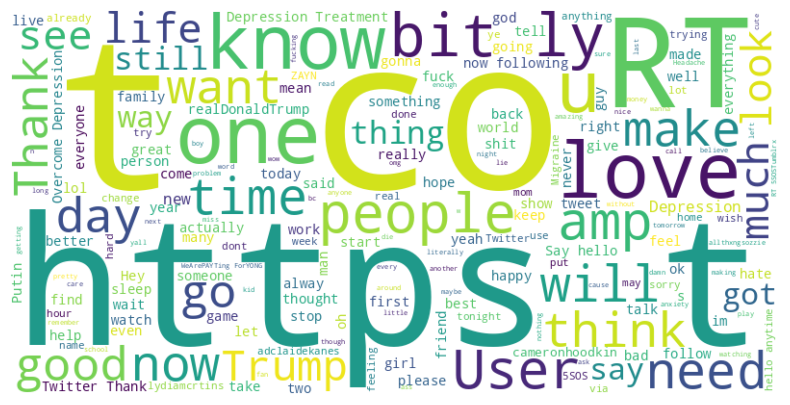

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(dataframe, columna_texto):
    # Concatenar todos los textos en un solo string
    text = " ".join(post for post in dataframe[columna_texto])

    # Generar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Mostrar la imagen generada
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Se ejecuta la función generate_word_cloud para mostrar la nube de palabras de la variable post_text
print("Word cloud")
generate_word_cloud(dataframe, 'post_text')

# Limpieza

La limpieza de datos implica la identificación y la corrección de posibles problemas en el conjunto de datos para asegurar que estén completos y coherentes, lo cual es fundamental para obtener resultados significativos en el análisis posterior.

En esta etapa se eliminarán aquellos datos o variables del dataframe que, por su naturaleza o por no adecuarse al caso de uso, puedan suponer un problema en la etapa de entrenamiento y evaluación del modelo de IA. En esta sección se evaluarán distintos aspectos de limpieza de datos.

## Eliminación de variables innecesarias

Se deben eliminar todas aquellas variables que no aporten al caso de estudio, en este escenario el objetivo es realizar predicciones sobre la salud mental del autor del post en base al contenido del mismo, por tanto se eliminarán todas salvo post_text (contenido del tweet) y label (evaluación de la salud mental).

In [ ]:
dataframe.drop(['Unnamed: 0', 'post_id', 'post_created', 'user_id', 'followers', 'friends', 'favourites', 'statuses', 'retweets'], axis=1, inplace=True)

## Detección de valores atípicos

La detección y eliminación de valores atípicos es un proceso en el que se identifican observaciones inusuales o extremas en un conjunto de datos y se toman medidas para eliminarlas o corregirlas. Los valores atípicos (outliers) pueden distorsionar los resultados del análisis y afectar negativamente el rendimiento de los modelos de aprendizaje automático.

En el punto de generación de las gráficas boxplot se evaluó la posible presencia de outliers debido a tweets de gran viralidad, sin embargo al haber eliminado las columnas numéricas carece de sentido aplicar algoritmos de detección de outliers.

## Imputación de valores nulos

La eliminación o imputación de valores faltantes es un proceso utilizado en el análisis de datos para tratar con observaciones que tienen valores ausentes. Cuando se encuentran valores faltantes en un conjunto de datos, es necesario abordarlos para que no afecten negativamente al entrenamiento y evaluación del modelo.

En nuestro caso, como pudimos ver en el análisis exploratorio no se encontró ningún valor faltante en el dataset, por lo que no será necesario utilizar ninguna técnica de imputación de valores nulos.

## Eliminar emoticonos

En el contexto de redes sociales es habitual añadir emoticonos a los posts que se suben, estos simbolos pueden suponer un problema para los algoritmos a la hora de procesar la entrada que reciben y por tanto mediante el uso de expresiones regulares se eliminarán.

In [ ]:
def compile_and_remove_emojis(text):
    # Compilar un patrón regex para encontrar emojis y eliminarlos del texto.
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticonos
        u"\U0001F300-\U0001F5FF"  # símbolos y pictogramas
        u"\U0001F680-\U0001F6FF"  # símbolos de mapeado
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+",
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

## Eliminar menciones a usuarios

Por la naturaleza de las propias redes sociales es habitual ver a usuarios interactuando entre ellos, en el caso de Tweeter (la fuente de los posts) para interactuar con otros usuarios se les debe mencionar mediante la estructura @{nombre del usuario}, por tanto todas aquellas palabras que empiecen por @ se tratarán de identificadores de usuarios que deben eliminarse al no aportar nada al modelo de IA y que solo suponen un gran aumento del número de palabras diferentes en el corpus de información.

In [ ]:
def remove_mentions(text):
    # Eliminar palabras que empiecen por '@' del texto.
    return ' '.join([word for word in text.split() if not word.startswith('@')])

## Eliminar caracteres externos al abecedario inglés

Como ya se ha visto el idioma en el que están escritos los posts es el inglés, sin embargo aparecen algunos caracteres de otros abecedarios como el chino o el japonés, para reducir la cantidad de tokens distintos y centrarnos en un solo abecedario se eliminarán todos los caracteres que no pertenezcan al del idioma inglés.

In [ ]:
def remove_non_english_characters(text):
    # Eliminar caracteres que no sean del alfabeto inglés del texto.
    return re.sub(r'[^a-z\s]', '', text)

## Eliminar urls

Es frecuente ver posts en redes sociales que comparten urls a otros sitios de la web, dado que únicamente queremos evaluar sentimientos en base a palabras, la presencia de urls a otras webs no aporta nada al caso de estudio y por tanto deben eliminarse.

In [ ]:
def remove_urls(text):
    # Eliminar URLs del texto.
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

## Eliminar números y caracteres

La unidad mínima de información con la que van a trabajar los algoritmos son las palabras, por tanto se eliminan todos los números y puntuaciones de texto para centrarse en las palabras.

In [ ]:
def remove_numbers_and_punctuation(text):
    # Eliminar números y puntuación del texto.
    text = re.sub(r'[0-9]+', '', text)
    return re.sub(r'[^\w\s]', '', text)

# Preprocesamiento

El proceso de preprocesado de un conjunto de datos tiene como objetivo prepararlo para su utilización en algoritmos de análisis y modelado. Se compone de una serie de pasos que buscan garantizar la calidad de los datos para su posterior manipulación por algoritmos de aprendizaje automático u otras técnicas.

Dos de los puntos más importantes del preprocesado de la información son:

* Estandarización de variables numéricas: tiene como objetivo transformar las variables numéricas para que tengan una media de cero y una desviación estándar de uno. Esto significa que los valores de las variables transformadas estarán centrados alrededor de cero y tendrán una dispersión similar, lo que facilita la comparación y el análisis de las variables.

* Codificación de variables categóricas: es un proceso que se utiliza para convertir variables categóricas en una forma numérica que los algoritmos de aprendizaje automático pueden entender y utilizar de manera efectiva.

En este caso ninguno de los puntos anteriores se aplicaría, puesto que las variables numéricas han sido eliminadas por ser innecesarias en el caso de uso y respecto a las variables categóricas solo se encuentra la variable label la cual ya está codificada en valores 0 y 1.

Debido a que únicamente es necesario preprocesar la variable del contenido de los posts, este punto se centrará en un tipo de preprocesamiento distinto a los dos mencionads anteriormente, este se trata del preprocesamiento de lenguaje natural (PLN). El preprocesamiento de texto consiste en transformar los datos textuales en un formato que los algoritmos de IA puedan procesar para poder trabajar con ellos correctamente. Este proceso incluye diversos puntos de limpieza y transformación de texto que culminan con la conversión a una representación numérica que el modelo pueda entender.

## Lematización


La lematización es un proceso en el procesamiento de lenguaje natural (PLN) que consiste en reducir las palabras a su forma base o raíz (lema), el lema es la forma canónica o mínima de una palabra. Es importante transformar las palabras que aparecen en los posts a sus formas bases para reducir el número de palabras diferentes que aparecen, de modo que el algoritmo de IA pueda encontrar relaciones entre tweets con mayor facilidad.

In [ ]:
def lemmatize_words(words, stop_words):
    # Lematizar las palabras que no sean stopwords.
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

## Obtener stop words

Los stop words son aquellos términos que no aportan mucho poder informativo, como ejemplos podemos tener determinantes, preposiciones, en general palabras comunes que sirven para unir términos entre otros muchos. En este caso dado que los posts están escritos en inglés se descarga un conjunto de stop words de dicho idioma para que sean eliminados del contenido de los tweets.

In [ ]:
def get_stop_words():
    # Obtener el conjunto de stopwords en inglés.
    return set(stopwords.words('english'))

## Tokenizar

Tokenizar se refiere al proceso de dividir una unidad textual en otras de menor tamaño, las unidades con las que se trabaja en este notebook son posts que consisten en una sola frase, por tanto la división de los posts en unidades más pequeñas pasará por separarlos en las distintas palabras que los integran.

In [ ]:
def tokenize(text):
    # Dividir el texto en palabras.
    return text.split()

## Convertir a minúsculas y eliminar espacios

Se debe convertir todo el texto a minúsculas o mayúsculas para eliminar posibles diferencias entre una misma palabra que pueda aparecer en varios puntos con un tipo de letras u otros, al pasarlo todo a minúsculas eliminamos esa posible diferencia. Además se deben eliminar espacios en blanco que puedan aparecer antes o después de una palabra, con el objetivo de reducirlas a las unidades mínimas informativas.

In [ ]:
def to_lowercase_and_strip(text):
    # Convertir el texto a minúsculas y eliminar espacios en blanco.
    return text.lower().strip()

## Reconstruir frase

Una vez se han aplicado todos los puntos de limpieza y preprocesamiento anteriores, es necesario volver a reconstruir el contenido del post con los nuevos tokens que se han generado y sin la presencia de los términos y caracteres eliminados.

In [ ]:
def join_words(words):
    # Unir una lista de palabras en un solo string.
    return ' '.join(words)

## Preprocesar texto

Finalmente en este punto se aplican todas las técnicas de PLN definidas anterioremente: limpieza de texto, tokenización y eliminación de palabras vacías y lematización, con el objetivo de transformar los posts a la unión de las mínimas unidades infomativas que los componían.

In [ ]:
!pip uninstall -y nltk
!pip install -U nltk

import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords

# Descargar los recursos necesarios de NLTK solo si no están ya disponibles
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
#nltk.download('words', quiet=True)

def preprocess_text(text):
    # Realizar todas las operaciones de preprocesamiento en el texto.
    text = remove_mentions(text)
    text = to_lowercase_and_strip(text)
    text = compile_and_remove_emojis(text)
    text = remove_urls(text)
    text = remove_non_english_characters(text)
    text = remove_numbers_and_punctuation(text)
    words = tokenize(text)
    stop_words = get_stop_words()
    words = lemmatize_words(words, stop_words)
    return join_words(words)

# Aplicar la función de preprocesamiento a la columna 'post_text'
dataframe['post_text'] = dataframe['post_text'].apply(preprocess_text)

print(dataframe['post_text'])

Found existing installation: nltk 3.8.1
Uninstalling nltk-3.8.1:
  Successfully uninstalled nltk-3.8.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.9 MB/s eta 0:00:00
0        year since diagnosed anxiety depression today ...
1        sunday need break im planning spend little tim...
2                        awake tired need sleep brain idea
3        rt retro bear make perfect gift great beginner...
4        hard say whether packing list making life easi...
                               ...                        
19995                      day without sunshine like night
19996    borens law charge ponder trouble delegate doub...
19997    flow chart thoroughly oversold piece program d...
19998                    ship safe harbor never meant stay
19999                         black hole god dividing zero
Name: post_text, Length: 20000, dtype: object


## Bag of words

Bag of Words es una forma de representación del texto que divide los documentos en sus palabras constituyentes y crea una representación numérica basada en la frecuencia de aparición de cada palabra. Para ello convierte cada palabra en una columna, cada fila representa una frase de las entradas originales y el cruce entre la fila y la columna representa si dicha palabra (columna) aparece (1) o no (0) en dicha frase (fila).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Utilizar CountVectorizer para crear la matriz de bolsa de palabras
vectorizer = CountVectorizer()

# Ajustar y transformar los datos preprocesados
X = vectorizer.fit_transform(dataframe['post_text'])

# Obtener los nombres de las características (palabras únicas)
feature_names = vectorizer.get_feature_names_out()

# Convertir la matriz en un array
X_array = X.toarray()

# Crear un nuevo DataFrame con la matriz de bolsa de palabras
df_bag_of_words = pd.DataFrame(data=X_array, columns=feature_names)

print("Lista de palabras únicas: \n", feature_names)
print("Número de palabras únicas:", len(feature_names))
print("Matriz de Bolsa de Palabras: \n", X_array)

df_bag_of_words['label'] = dataframe['label']

# Mostrar el nuevo DataFrame
print(df_bag_of_words)

Lista de palabras únicas: 
 ['aa' 'aaa' 'aaaaaaazfar' ... 'zwart' 'zyl' 'zyls']
Número de palabras únicas: 18896
Matriz de Bolsa de Palabras: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
       aa  aaa  aaaaaaazfar  aaaaaiiigh  aaaaand  aaahhg  aaay  aag  aamir  \
0       0    0            0           0        0       0     0    0      0   
1       0    0            0           0        0       0     0    0      0   
2       0    0            0           0        0       0     0    0      0   
3       0    0            0           0        0       0     0    0      0   
4       0    0            0           0        0       0     0    0      0   
...    ..  ...          ...         ...      ...     ...   ...  ...    ...   
19995   0    0            0           0        0       0     0    0      0   
19996   0    0            0           0        0       0     0    0      0   
19997   0    0            0       

# Reducción de dimensionalidad

La reducción de dimensionalidad permite disminuir la cantidad de variables en un conjunto de datos mientras se conserva la mayor cantidad posible de información relevante, es útil para visualizar datos de alta dimensionalidad, eliminar el ruido, mejorar la eficiencia computacional y prevenir el sobreajuste en modelos de aprendizaje automático.

Es clave saber elegir el número correcto de componentes que queremos obtener del algoritmo de reducción de la dimensionalidad, puesto que un número de componentes inadecuadamente bajo puede hacer que el modelo pierda información que le sería de utilidad, mientras que un número excesivamente alto hace que pierda valor el uso de la técnica al no estar eliminando tanta información redundante como sería posible.

El dataframe obtenido como resultado de aplicar la técnica Bag of Words mantiene las 20000 filas originales pero tiene una columna por cada término distinto que aparece entre todas las filas tras aplicar la limpieza y preprocesamiento, esto hace que la matriz final tenga 18896 columnas, una dimensionalidad excesivamente alta que evidencia la necesidad de aplicar técnicas de reducción de la dimensionalidad para poder ser abordadas por los algoritmos de IA.

Existe una gran variedad de algoritmos que transforman los datos originales en un espacio de menor dimensión manteniendo las características más importantes, el presente trabajo se centrará en el uso de las técnicas Principal Components Analysis y Truncated Singular Value Descomposition.

## Principal Component Analysis

Principal Component Analysis (PCA) es una técnica de reducción de dimensionalidad que transforma los datos originales en un nuevo conjunto de variables llamadas componentes principales. Estas componentes están ordenadas por la cantidad de varianza que recogen, PCA encuentra las direcciones (componentes principales) que maximizan la varianza en los datos, con el objetivo de compactar la mayor cantidad varianza en la menor cantidad de información posible.

In [ ]:
from sklearn.decomposition import PCA

# Definir el número de componentes principales
num_components = 100

# Crear el objeto PCA y ajustar los datos
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(df_bag_of_words.drop('label', axis=1))

# Crear un nuevo DataFrame con las componentes principales
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, num_components+1)])
df_pca['label'] = dataframe['label']

# Mostrar el nuevo DataFrame
print(df_pca)

            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -0.281678  0.612719  1.092411  0.339935  0.257056  0.014171  0.134534   
1     -0.202719  0.864018  0.267639  0.210439 -0.149440  0.057225  0.022974   
2     -0.204246 -0.027732 -0.018931 -0.039414 -0.084323  0.039179 -0.043644   
3      0.815365 -0.012120  0.008989 -0.070311 -0.006778  0.134982  0.071404   
4     -0.193778 -0.027537 -0.213500  0.334368  0.230930  0.116623  0.041323   
...         ...       ...       ...       ...       ...       ...       ...   
19995 -0.176983  0.151018 -0.213647 -0.390786  0.559953 -0.605299 -0.041188   
19996 -0.195572 -0.080429 -0.033833 -0.008189 -0.116890 -0.033142 -0.058445   
19997 -0.196230 -0.060440 -0.025741 -0.010884 -0.116218 -0.042100 -0.048564   
19998 -0.185453 -0.041289 -0.041672 -0.023203 -0.107231 -0.018580 -0.033869   
19999 -0.192425 -0.065989 -0.051443 -0.007507 -0.109975 -0.019871 -0.064574   

            PC8       PC9      PC10  ...      PC92 

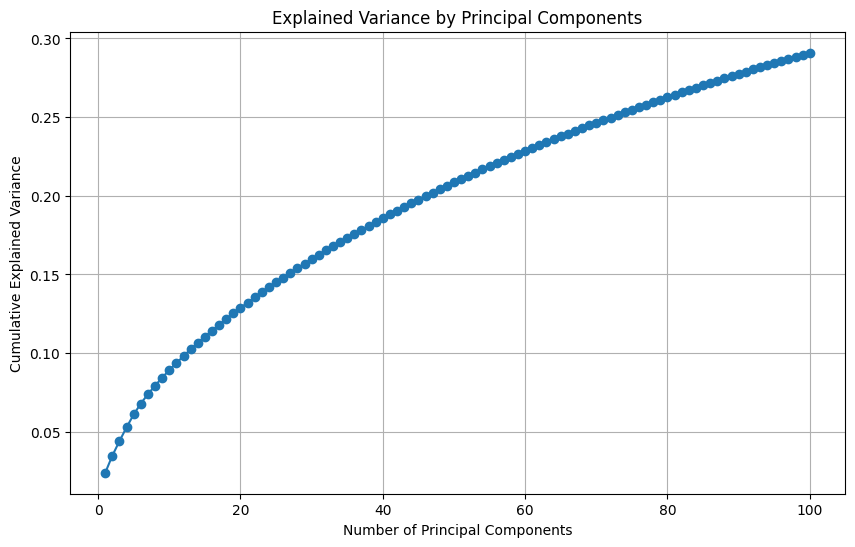

In [ ]:
import matplotlib.pyplot as plt

# Calcular la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_.cumsum()

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_components+1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

## Truncated Singular Value Decomposition

Truncated Singular Value Decomposition (Truncated SVD) es una técnica de reducción de dimensionalidad utilizada principalmente en el contexto de matrices dispersas, como es el caso de estudio planteado en el que partimos de una matriz resultantes de Bag of Words. SVD es una técnica matemática que descompone una matriz grande en tres matrices más simples, mientras que Truncated SVD toma solo las primeras "k" partes más importantes de estas tres matrices, siendo "k" el número de componentes al que se quiere reducir la matriz.



In [ ]:
from sklearn.decomposition import TruncatedSVD

# Definir el número de componentes
num_components = 100

# Crear el objeto Truncated SVD y ajustar los datos
svd = TruncatedSVD(n_components=num_components)
X_svd = svd.fit_transform(df_bag_of_words.drop('label', axis=1))

# Crear un nuevo DataFrame con las componentes principales
df_svd = pd.DataFrame(data=X_svd, columns=[f'SVD{i}' for i in range(1, num_components+1)])
df_svd['label'] = dataframe['label']

# Mostrar el nuevo DataFrame
print(df_svd)

           SVD1      SVD2      SVD3      SVD4      SVD5      SVD6      SVD7  \
0      0.236092  1.084137  0.629093 -0.696472  0.354175 -0.048600  0.061088   
1      0.185256  0.884700 -0.270101 -0.374110  0.249817  0.076161  0.043709   
2      0.041990  0.117584  0.041962  0.020511 -0.037764  0.081288  0.033315   
3      1.062851 -0.038485  0.038058  0.014735 -0.074182  0.169272  0.142992   
4      0.161406  0.317404  0.191353  0.437387  0.278059  0.123159  0.086970   
...         ...       ...       ...       ...       ...       ...       ...   
19995  0.141063  0.392775  0.083917  0.396617 -0.458928 -0.691295 -0.003892   
19996  0.001615  0.006733  0.006610  0.001281 -0.000592  0.005039  0.009429   
19997  0.022836  0.048969  0.017546  0.002005 -0.004162  0.004413  0.037505   
19998  0.035853  0.065117  0.005009  0.016956 -0.018188  0.027256  0.045881   
19999  0.018413  0.033375  0.003479  0.023632 -0.002359  0.020870  0.013676   

           SVD8      SVD9     SVD10  ...     SVD92 

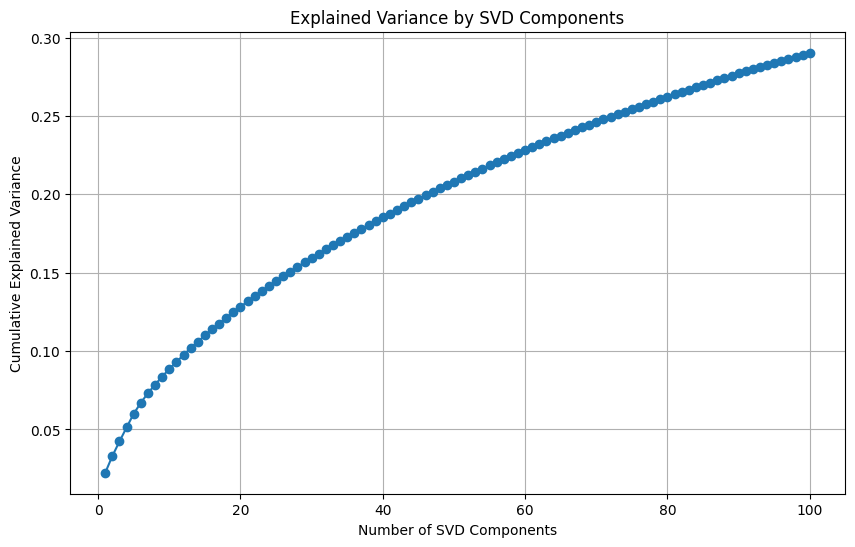

In [ ]:
# Calcular la varianza explicada acumulada
explained_variance = svd.explained_variance_ratio_.cumsum()

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_components+1), explained_variance, marker='o')
plt.title('Explained Variance by SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Entrenamiento y Evaluación

El entrenamiento de un modelo de IA es el proceso mediante el cual el modelo aprende a realizar predicciones o tomar decisiones basadas en datos de entrada, para ello el modelo se ajusta a la estrctura y contenido del conjunto de datos de entrada y a las salidas conocidas (etiquetas), utilizando algoritmos de aprendizaje. El objetivo es minimizar el error entre las predicciones del modelo y los valores reales, ajustando los parámetros internos del modelo.

La validación es el proceso de evaluar el rendimiento del modelo entrenado utilizando un conjunto de datos diferente al conjunto de entrenamiento, ayuda a verificar si el modelo generaliza bien a datos nuevos y no solo a los datos con los que fue entrenado. La validación se utiliza para ajustar hiperparámetros y evitar problemas como el sobreajuste (overfitting).

En este apartado se realizará el entrenamiento y evaluación de diversos modelos de IA, para este propósito se emplearán algoritmos pertenecientes a distintas ramas del aprendizaje automático. El objetivo es obtener una comparativo del rendimiento de todas las técnicas siendo evaluadas por las mismas métricas.

Para evaluar las distintas opciones de preprocesamiento y técnicas de entrenamiento se utilizará el método holdout, realizando varias particiones mediante el algoritmo train-test. Se dividirá el conjunto de datos de entrada en 5 particiones diferentes, controlando la reproducibilidad mediante una semilla, con esto se pretende comparar el rendimiento de un mismo modelo en varias particiones de un mismo dataset.

La evaluación del rendimiento del modelo se realizará utilizando F1 como métrica de evaluación, que muestra la media entre la precisión y la exhaustividad del modelo, donde la precisión se refiere a la proporción de predicciones positivas correctas entre todas las predicciones positivas, y la exhaustividad se refiere a la proporción de instancias positivas que fueron correctamente identificadas por el modelo entre todas las instancias positivas reales. Además se empleará la matriz de confusión para observar con claridad el número de instancias positivas y negativas clasificadas correcta e incorrectamente.

Para cada opción, se mostrará la puntuación F1  y la matriz de confusión obtenida en cada una de las 5 particiones de datos, además de la media y la desviación estándar de estas 5 puntuaciones.

## Algoritmos tradicionales

Los algoritmos tradicionales de machine learning son métodos estadísticos y computacionales utilizados para identificar patrones en los datos y hacer predicciones basadas en estos. A diferencia de las técnicas más avanzadas como las redes neuronales profundas, estos algoritmos suelen ser más sencillos de implementar y entender, y son adecuados para realizar un primer análisis del rendimiento de modelos en base a los datos de entrada por su simplicidad, eficiencia y velocidad.

Respecto a los algoritmos de aprendizaje supervisado que se compararán, dado que se trata de un problema de clasificación binaria, se han elegido los siguientes algoritmos: Decision Tree, K-Nearest Neighbors y Support Vector Classifier. Todos estos métodos comparten una serie de líneas de código comunes necesarias para su ejecución con las condiciones planteadas en el punto anterior, por ello se declara el siguiente método con todos esos aspectos comunes.

Los hiperparámetros son configuraciones del modelo que deben ser establecidas antes del entrenamiento y tienen un impacto crucial en su rendimiento, el proceso de encontrar la mejor combinación de hiperparámetros se llama tuning o ajuste de hiperparámetros. Para cada uno de los algoritmos se utilizará la técnica GridSearchCV que permite obtener sus mejores hiperparámetros para el conjunto de datos con el que se está trabajando.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

def common_evaluate(dataframe, target, classifier, param_grid, name):
  # Verificar si el DataFrame contiene la columna objetivo
  if target not in dataframe.columns:
    raise ValueError(f"La columna objetivo '{target}' no se encuentra en el DataFrame")

  print("Evaluación del Modelo:\n")

  # Eliminar la columna objetivo del DataFrame
  features = dataframe.drop(columns=[target])
  labels = dataframe[target]

  # Usar una semilla para la reproducibilidad
  seed = 42

  # Realizar 5 particiones train-test
  n_splits = 5
  holdout_results = []  # Almacenar resultados

  for split in range(n_splits):
    # Crear particiones de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=seed + split)

    # Crear un pipeline con StandardScaler y el clasificador
    pipeline = make_pipeline(StandardScaler(), classifier)

    # Configurar GridSearchCV con el pipeline y los hiperparámetros específicos
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)

    # Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
    grid_search.fit(X_train, y_train)

    # Obtener el mejor modelo encontrado
    best_pipeline = grid_search.best_estimator_

    # Predecir en el conjunto de prueba
    y_pred = best_pipeline.predict(X_test)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Imprimir métricas de evaluación para cada clasificador
    print(f"Split {split + 1} - {name}:\n")
    print("Mejores Hiperparámetros: ", grid_search.best_params_)
    print("Matriz de Confusión: \n")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Matriz de Confusión - {name} (Split {split + 1})")
    plt.gcf().set_size_inches(5, 3)  # Ajustar el tamaño de la gráfica a 5x3 pulgadas
    plt.show()

    # Calcular e imprimir métricas adicionales
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Puntuación F1 (Weighted): {f1:.4f}")
    print(f"Precisión (Weighted): {precision:.4f}")
    print(f"Recall (Weighted): {recall:.4f}\n")

    # Guardar resultados
    holdout_results.append({
      'f1': f1,
      'precision': precision,
      'recall': recall,
      'params': grid_search.best_params_
    })

  # Resumen de resultados
  f1_scores = [result['f1'] for result in holdout_results]
  precision_scores = [result['precision'] for result in holdout_results]
  recall_scores = [result['recall'] for result in holdout_results]

  print(f"Resultados generales para {name}:\n")
  print(f"Puntuación F1 Media: {np.mean(f1_scores):.4f}")
  print(f"Desviación Estándar de F1: {np.std(f1_scores):.4f}")
  print(f"Precisión Media: {np.mean(precision_scores):.4f}")
  print(f"Desviación Estándar de Precisión: {np.std(precision_scores):.4f}")
  print(f"Recall Medio: {np.mean(recall_scores):.4f}")
  print(f"Desviación Estándar de Recall: {np.std(recall_scores):.4f}\n")

### DecisionTree

Este algoritmo de aprendizaje supervisado construye un árbol de decisiones a partir de los datos de entrenamiento. Cada nodo del árbol representa una característica, cada rama una decisión basada en esa característica, y cada hoja una etiqueta de clasificación. Es útil para problemas de clasificación y regresión, proporcionando una visualización fácil de entender del proceso de toma de decisiones.

Hiperparámetros:
 * criterion: Gini y Entropy son los criterios para medir la calidad de una división. Gini mide la impureza y Entropy mide la desorganización de la información.
 * max_depth: Controla la profundidad máxima del árbol para evitar el sobreajuste. None permite que el árbol crezca sin limitaciones, mientras que valores como 10, 20, y 30 limitan su crecimiento.

PCA Dataframe 

Evaluación del Modelo:

Split 1 - DecisionTree:

Mejores Hiperparámetros:  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 30}
Matriz de Confusión: 



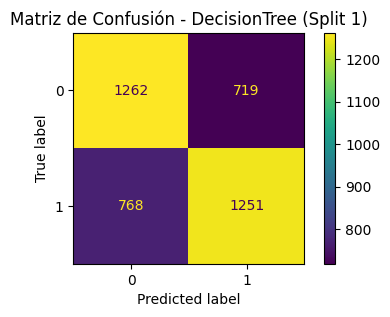

Puntuación F1 (Weighted): 0.6282
Precisión (Weighted): 0.6284
Recall (Weighted): 0.6282

Split 2 - DecisionTree:

Mejores Hiperparámetros:  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': None}
Matriz de Confusión: 



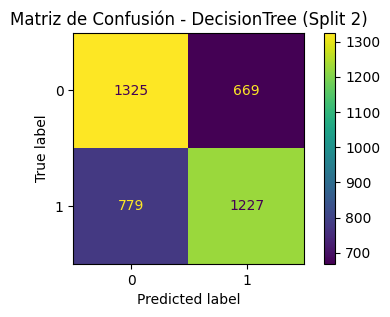

Puntuación F1 (Weighted): 0.6378
Precisión (Weighted): 0.6385
Recall (Weighted): 0.6380

Split 3 - DecisionTree:

Mejores Hiperparámetros:  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': None}
Matriz de Confusión: 



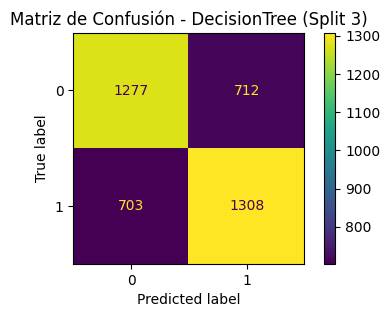

Puntuación F1 (Weighted): 0.6462
Precisión (Weighted): 0.6462
Recall (Weighted): 0.6462

Split 4 - DecisionTree:

Mejores Hiperparámetros:  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 30}
Matriz de Confusión: 



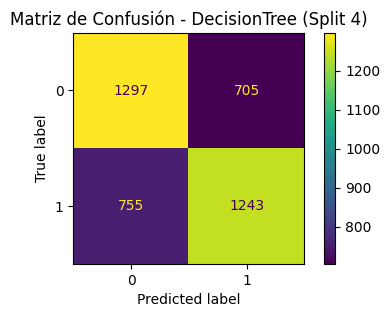

Puntuación F1 (Weighted): 0.6349
Precisión (Weighted): 0.6351
Recall (Weighted): 0.6350

Split 5 - DecisionTree:

Mejores Hiperparámetros:  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': None}
Matriz de Confusión: 



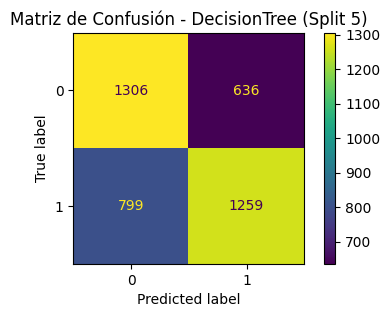

Puntuación F1 (Weighted): 0.6411
Precisión (Weighted): 0.6430
Recall (Weighted): 0.6412

Resultados generales para DecisionTree:

Puntuación F1 Media: 0.6377
Desviación Estándar de F1: 0.0060
Precisión Media: 0.6383
Desviación Estándar de Precisión: 0.0062
Recall Medio: 0.6377
Desviación Estándar de Recall: 0.0060

SVD Dataframe 

Evaluación del Modelo:

Split 1 - DecisionTree:

Mejores Hiperparámetros:  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': None}
Matriz de Confusión: 



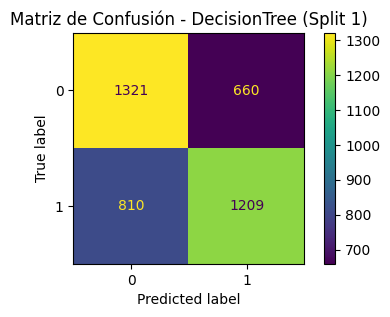

Puntuación F1 (Weighted): 0.6321
Precisión (Weighted): 0.6335
Recall (Weighted): 0.6325

Split 2 - DecisionTree:

Mejores Hiperparámetros:  {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 30}
Matriz de Confusión: 



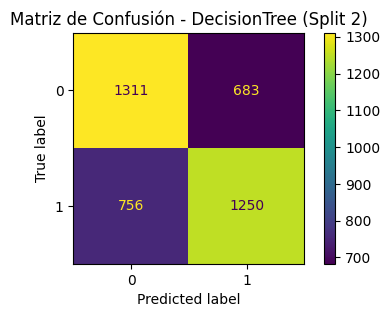

Puntuación F1 (Weighted): 0.6401
Precisión (Weighted): 0.6405
Recall (Weighted): 0.6402

Split 3 - DecisionTree:

Mejores Hiperparámetros:  {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': None}
Matriz de Confusión: 



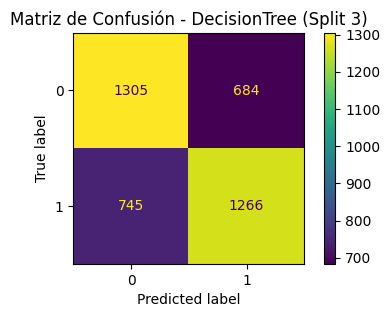

Puntuación F1 (Weighted): 0.6427
Precisión (Weighted): 0.6429
Recall (Weighted): 0.6428

Split 4 - DecisionTree:

Mejores Hiperparámetros:  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 30}
Matriz de Confusión: 



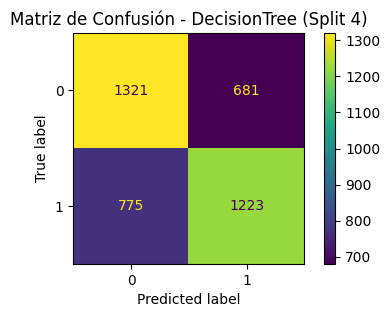

Puntuación F1 (Weighted): 0.6358
Precisión (Weighted): 0.6363
Recall (Weighted): 0.6360

Split 5 - DecisionTree:

Mejores Hiperparámetros:  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 30}
Matriz de Confusión: 



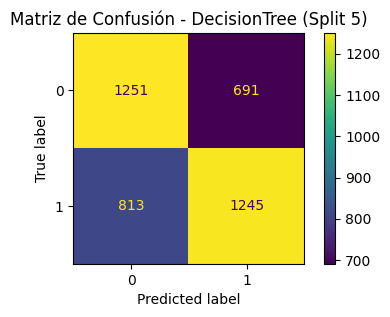

Puntuación F1 (Weighted): 0.6240
Precisión (Weighted): 0.6251
Recall (Weighted): 0.6240

Resultados generales para DecisionTree:

Puntuación F1 Media: 0.6349
Desviación Estándar de F1: 0.0066
Precisión Media: 0.6357
Desviación Estándar de Precisión: 0.0062
Recall Medio: 0.6351
Desviación Estándar de Recall: 0.0066



In [ ]:
def evaluate_decision_tree(dataframe, target):
  classifier = DecisionTreeClassifier()
  param_grid = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 10, 20, 30]
  }
  common_evaluate(dataframe, target, classifier, param_grid, 'DecisionTree')

#evaluate_decision_tree(df_bag_of_words, 'label')
print("PCA Dataframe \n")
evaluate_decision_tree(df_pca, 'label')
print("SVD Dataframe \n")
evaluate_decision_tree(df_svd, 'label')

### KNeighbours

Este clasificador asigna una etiqueta a un punto de datos basándose en la mayoría de las etiquetas de sus k vecinos más cercanos. Es un algoritmo de aprendizaje supervisado simple y versátil que se adapta bien a conjuntos de datos con estructuras no lineales y cuando la localidad en la distribución de datos es importante. Sin embargo, puede ser computacionalmente costoso para grandes conjuntos de datos y puede requerir una normalización adecuada de los datos para funcionar correctamente.

Hiperparámetros:
 * n_neighbors: Número de vecinos a considerar en la clasificación. Probar con 3, 5 y 7 ayuda a encontrar el balance entre considerar pocos o muchos vecinos.
 * weights: uniform da el mismo peso a todos los vecinos, mientras que distance da más peso a los vecinos más cercanos.

In [ ]:
def evaluate_k_neighbors(dataframe, target):
  classifier = KNeighborsClassifier()
  param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],
    'kneighborsclassifier__weights': ['uniform', 'distance']
  }
  common_evaluate(dataframe, target, classifier, param_grid, 'KNeighbors')

PCA Dataframe 

Evaluación del Modelo:

Split 1 - KNeighbors:

Mejores Hiperparámetros:  {'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__weights': 'distance'}
Matriz de Confusión: 



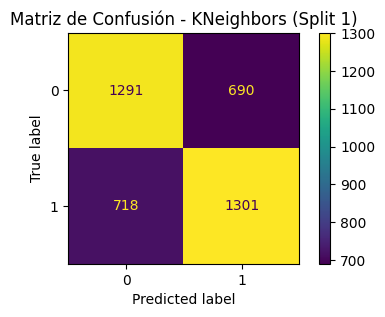

Puntuación F1 (Weighted): 0.6480
Precisión (Weighted): 0.6481
Recall (Weighted): 0.6480

Split 2 - KNeighbors:

Mejores Hiperparámetros:  {'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__weights': 'distance'}
Matriz de Confusión: 



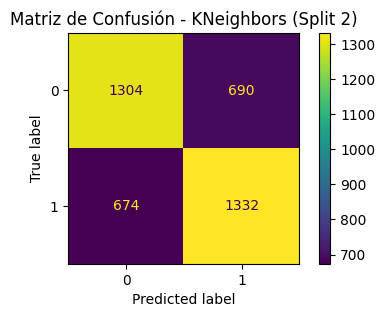

Puntuación F1 (Weighted): 0.6590
Precisión (Weighted): 0.6590
Recall (Weighted): 0.6590

Split 3 - KNeighbors:

Mejores Hiperparámetros:  {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}
Matriz de Confusión: 



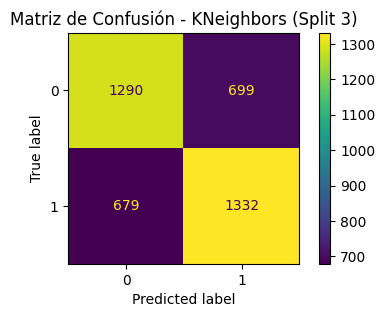

Puntuación F1 (Weighted): 0.6555
Precisión (Weighted): 0.6555
Recall (Weighted): 0.6555

Split 4 - KNeighbors:

Mejores Hiperparámetros:  {'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__weights': 'distance'}
Matriz de Confusión: 



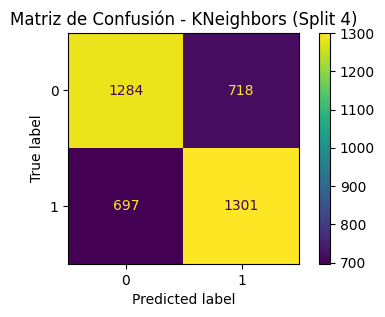

Puntuación F1 (Weighted): 0.6462
Precisión (Weighted): 0.6463
Recall (Weighted): 0.6462

Split 5 - KNeighbors:

Mejores Hiperparámetros:  {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__weights': 'distance'}
Matriz de Confusión: 



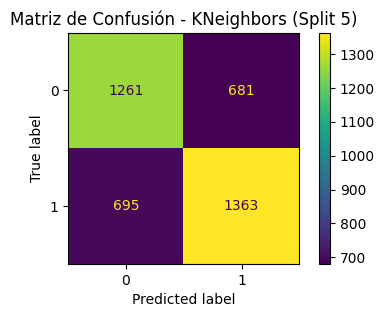

Puntuación F1 (Weighted): 0.6560
Precisión (Weighted): 0.6561
Recall (Weighted): 0.6560

Resultados generales para KNeighbors:

Puntuación F1 Media: 0.6530
Desviación Estándar de F1: 0.0049
Precisión Media: 0.6530
Desviación Estándar de Precisión: 0.0049
Recall Medio: 0.6529
Desviación Estándar de Recall: 0.0049

SVD Dataframe 

Evaluación del Modelo:

Split 1 - KNeighbors:

Mejores Hiperparámetros:  {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__weights': 'distance'}
Matriz de Confusión: 



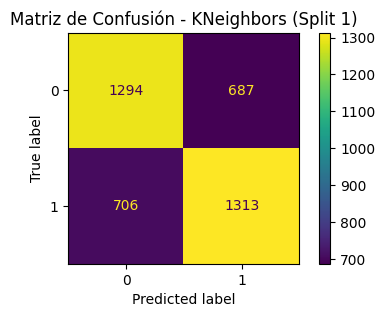

Puntuación F1 (Weighted): 0.6518
Precisión (Weighted): 0.6518
Recall (Weighted): 0.6518

Split 2 - KNeighbors:

Mejores Hiperparámetros:  {'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__weights': 'distance'}
Matriz de Confusión: 



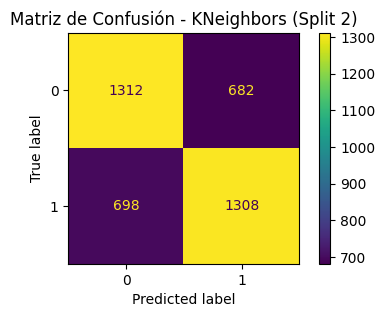

Puntuación F1 (Weighted): 0.6550
Precisión (Weighted): 0.6550
Recall (Weighted): 0.6550

Split 3 - KNeighbors:

Mejores Hiperparámetros:  {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}
Matriz de Confusión: 



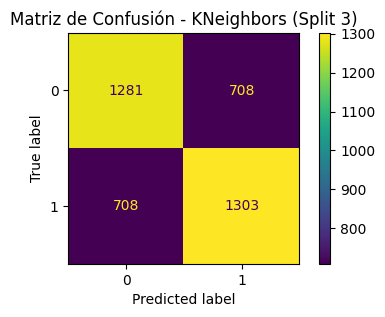

Puntuación F1 (Weighted): 0.6460
Precisión (Weighted): 0.6460
Recall (Weighted): 0.6460

Split 4 - KNeighbors:

Mejores Hiperparámetros:  {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__weights': 'distance'}
Matriz de Confusión: 



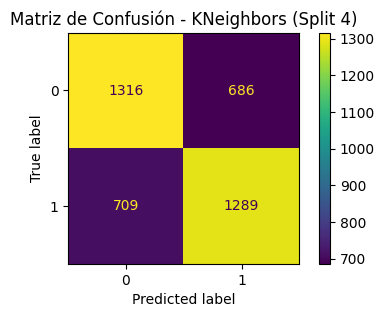

Puntuación F1 (Weighted): 0.6512
Precisión (Weighted): 0.6513
Recall (Weighted): 0.6512

Split 5 - KNeighbors:

Mejores Hiperparámetros:  {'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__weights': 'distance'}
Matriz de Confusión: 



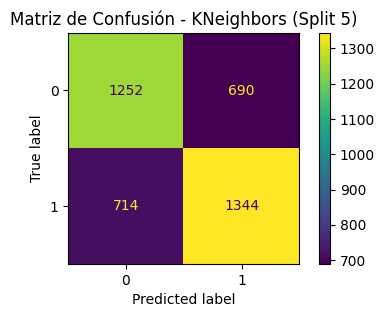

Puntuación F1 (Weighted): 0.6490
Precisión (Weighted): 0.6491
Recall (Weighted): 0.6490

Resultados generales para KNeighbors:

Puntuación F1 Media: 0.6506
Desviación Estándar de F1: 0.0030
Precisión Media: 0.6506
Desviación Estándar de Precisión: 0.0030
Recall Medio: 0.6506
Desviación Estándar de Recall: 0.0030



In [ ]:
#evaluate_k_neighbors(df_bag_of_words, 'label')
print("PCA Dataframe \n")
evaluate_k_neighbors(df_pca, 'label')
print("SVD Dataframe \n")
evaluate_k_neighbors(df_svd, 'label')

### Support Vector Classifier

es un algoritmo de aprendizaje supervisado que encuentra el hiperplano óptimo que maximiza el margen entre las clases en el espacio de características. Es útil para problemas de clasificación binaria y linealmente separables, pero también puede emplearse en problemas de regresión y clasificación no lineales mediante el uso de kernels. SVC es robusto frente a conjuntos de datos con alta dimensionalidad y es eficaz incluso en conjuntos de datos con un número pequeño de muestras.

Hiperparámetros:
 * C: Parámetro de regularización. Un C bajo puede provocar un ajuste
insuficiente, mientras que un C alto puede causar sobreajuste.
 * kernel: linear y rbf son tipos de kernel que transforman los datos. linear es una transformación lineal, mientras que rbf es una transformación no lineal basada en funciones radiales.

In [ ]:
def evaluate_svc(dataframe, target):
  classifier = SVC()
  param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf']
  }
  common_evaluate(dataframe, target, classifier, param_grid, 'SVC')

PCA Dataframe 

Evaluación del Modelo:



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Split 1 - SVC:

Mejores Hiperparámetros:  {'svc__C': 10, 'svc__kernel': 'rbf'}
Matriz de Confusión: 



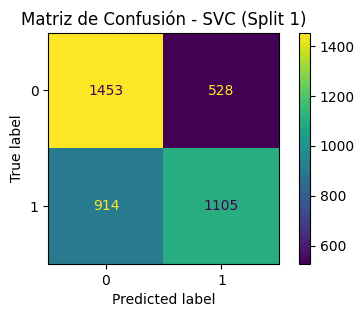

Puntuación F1 (Weighted): 0.6365
Precisión (Weighted): 0.6456
Recall (Weighted): 0.6395

Split 2 - SVC:

Mejores Hiperparámetros:  {'svc__C': 10, 'svc__kernel': 'linear'}
Matriz de Confusión: 



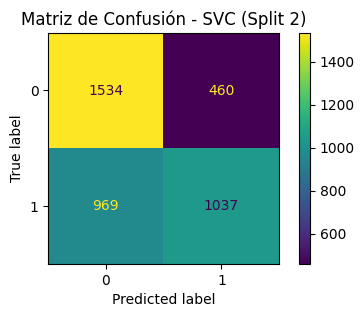

Puntuación F1 (Weighted): 0.6370
Precisión (Weighted): 0.6529
Recall (Weighted): 0.6428



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Split 3 - SVC:

Mejores Hiperparámetros:  {'svc__C': 1, 'svc__kernel': 'rbf'}
Matriz de Confusión: 



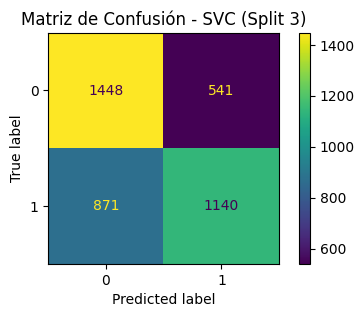

Puntuación F1 (Weighted): 0.6447
Precisión (Weighted): 0.6514
Recall (Weighted): 0.6470

Split 4 - SVC:

Mejores Hiperparámetros:  {'svc__C': 1, 'svc__kernel': 'rbf'}
Matriz de Confusión: 



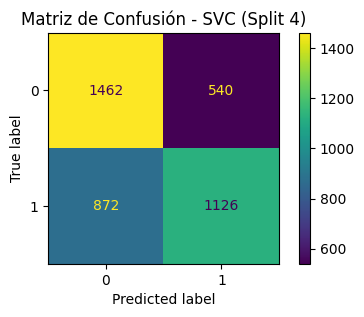

Puntuación F1 (Weighted): 0.6445
Precisión (Weighted): 0.6511
Recall (Weighted): 0.6470

Split 5 - SVC:

Mejores Hiperparámetros:  {'svc__C': 1, 'svc__kernel': 'rbf'}
Matriz de Confusión: 



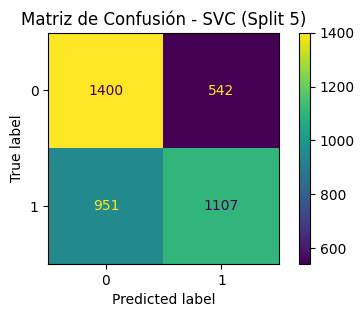

Puntuación F1 (Weighted): 0.6239
Precisión (Weighted): 0.6345
Recall (Weighted): 0.6268

Resultados generales para SVC:

Puntuación F1 Media: 0.6373
Desviación Estándar de F1: 0.0076
Precisión Media: 0.6471
Desviación Estándar de Precisión: 0.0068
Recall Medio: 0.6406
Desviación Estándar de Recall: 0.0075

SVD Dataframe 

Evaluación del Modelo:

Split 1 - SVC:

Mejores Hiperparámetros:  {'svc__C': 1, 'svc__kernel': 'rbf'}
Matriz de Confusión: 



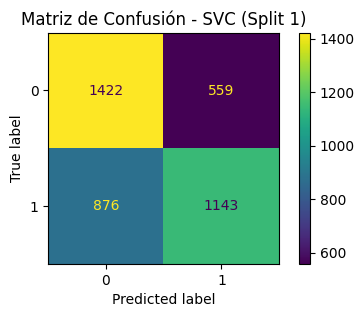

Puntuación F1 (Weighted): 0.6393
Precisión (Weighted): 0.6454
Recall (Weighted): 0.6412

Split 2 - SVC:

Mejores Hiperparámetros:  {'svc__C': 10, 'svc__kernel': 'rbf'}
Matriz de Confusión: 



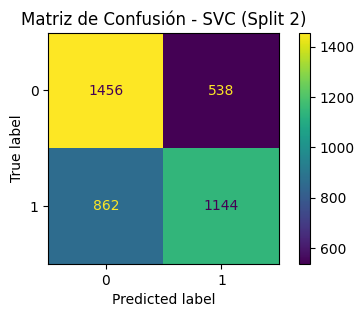

Puntuación F1 (Weighted): 0.6478
Precisión (Weighted): 0.6542
Recall (Weighted): 0.6500

Split 3 - SVC:

Mejores Hiperparámetros:  {'svc__C': 10, 'svc__kernel': 'rbf'}
Matriz de Confusión: 



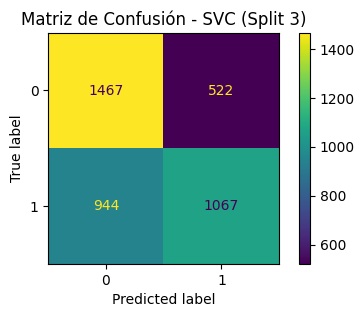

Puntuación F1 (Weighted): 0.6296
Precisión (Weighted): 0.6401
Recall (Weighted): 0.6335

Split 4 - SVC:

Mejores Hiperparámetros:  {'svc__C': 1, 'svc__kernel': 'rbf'}
Matriz de Confusión: 



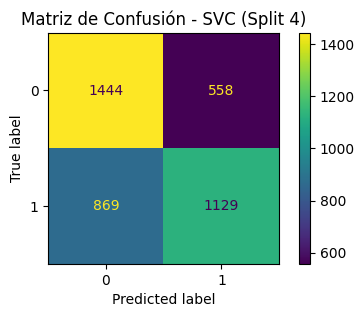

Puntuación F1 (Weighted): 0.6411
Precisión (Weighted): 0.6467
Recall (Weighted): 0.6432

Split 5 - SVC:

Mejores Hiperparámetros:  {'svc__C': 1, 'svc__kernel': 'rbf'}
Matriz de Confusión: 



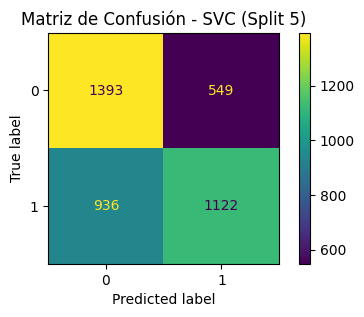

Puntuación F1 (Weighted): 0.6263
Precisión (Weighted): 0.6358
Recall (Weighted): 0.6288

Resultados generales para SVC:

Puntuación F1 Media: 0.6368
Desviación Estándar de F1: 0.0078
Precisión Media: 0.6445
Desviación Estándar de Precisión: 0.0062
Recall Medio: 0.6394
Desviación Estándar de Recall: 0.0075



In [ ]:
#evaluate_k_neighbors(df_bag_of_words, 'label')
print("PCA Dataframe \n")
evaluate_svc(df_pca, 'label')
print("SVD Dataframe \n")
evaluate_svc(df_svd, 'label')

## Red neuronal

Las redes neuronales son modelos de IA inspirados en el cerebro humano, que se utilizan para identificar patrones complejos y tomar decisiones basadas en datos. Se utilizará la biblioteca Keras para construir y entrenar un modelo de red neuronal, Keras ofrece una variedad de herramientas para el procesamiento y la clasificación de textos, como la capa de TextVectorization, que convierte los textos en secuencias de enteros, lo cual es necesario para transformar datos textuales en una representación numérica que pueda ser procesada por el modelo.

Primero el vectorizador se adaptará a los textos preprocesados para aprender el vocabulario y la longitud de las secuencias, tras ello se construye un modelo secuencial de Keras que permite definir una pila de capas de redes neuronales. El modelo empieza con una capa de entrada que recibe los textos como cadenas de caracteres y pasa por una capa de vectorización que convierte estas cadenas en secuencias de enteros. Luego, una capa de embedding transforma estos enteros en vectores densos de longitud fija, capturando relaciones semánticas entre palabras.

Para capturar relaciones contextuales en los textos, se utiliza una capa de Transformer Encoder, implementada mediante keras_nlp. Después, la capa de Global Max Pooling reduce la dimensionalidad seleccionando el valor máximo en una secuencia, proporcionando así una representación fija del texto. Las capas densas y dropout se añaden para proporcionar capacidad de aprendizaje no lineal y prevenir el sobreajuste. Finalmente, la capa de salida utiliza la activación softmax para producir probabilidades de pertenencia a cada clase.

El modelo se compila utilizando la función de pérdida sparse_categorical_crossentropy adecuada para problemas de clasificación multiclase, y el optimizador adam que ajusta los pesos del modelo basado en el gradiente descendente. Durante el entrenamiento, el método fit entrena el modelo con los datos de entrenamiento y valida su rendimiento en los datos de validación. En este caso los hiperparámetros que se emplearán son batch size (número de muestras procesadas antes de actualizar el modelo) y epochs (número de veces que el modelo pasa por el conjunto de entrenamiento completo).

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Suc

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'global_max_pooling1d' (of type GlobalMaxPooling1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization                   │ (None, 1024)                │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 1024, 128)           │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_encoder                  │ (None, 1024, 128)           │          99,584 │
│ (TransformerEncoder)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,388,165 (5.30 MB)

 Trainable params: 1,388,165 (5.30 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'value' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


400/400 ━━━━━━━━━━━━━━━━━━━━ 3866s 10s/step - accuracy: 0.5932 - loss: 0.8080 - val_accuracy: 0.7559 - val_loss: 0.4797
Epoch 2/2
400/400 ━━━━━━━━━━━━━━━━━━━━ 3959s 10s/step - accuracy: 0.8430 - loss: 0.3520 - val_accuracy: 0.7691 - val_loss: 0.4931
Evaluación del Modelo Keras:

125/125 ━━━━━━━━━━━━━━━━━━━━ 419s 3s/step
Evaluación - Modelo Keras:

Matriz de Confusión: 



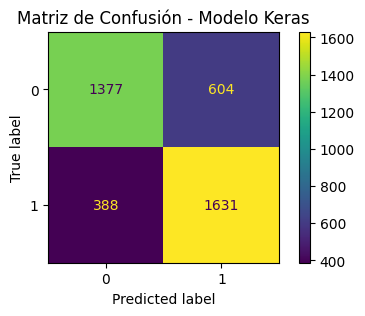

Puntuación F1 (Weighted): 0.7511
Precisión (Weighted): 0.7547
Recall (Weighted): 0.7520

Resultados generales para Modelo Keras:

Puntuación F1 (Weighted): 0.7511
Precisión (Weighted): 0.7547
Recall (Weighted): 0.7520


In [ ]:
# Instalar keras-nlp si no está instalado
!pip install keras-nlp

# Importar las librerías necesarias
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import keras_nlp

# Definir el método de evaluación
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score

def evaluate_keras_model(model, x_test, y_test, batch_size=32, name="Keras Model"):
    print("Evaluación del Modelo Keras:\n")

    # Predecir en el conjunto de prueba
    y_pred_probs = model.predict(x_test, batch_size=batch_size)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Imprimir métricas de evaluación
    print(f"Evaluación - {name}:\n")
    print("Matriz de Confusión: \n")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Matriz de Confusión - {name}")
    plt.gcf().set_size_inches(5, 3)  # Ajustar el tamaño de la gráfica a 5x3 pulgadas
    plt.show()

    # Calcular e imprimir métricas adicionales
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Puntuación F1 (Weighted): {f1:.4f}")
    print(f"Precisión (Weighted): {precision:.4f}")
    print(f"Recall (Weighted): {recall:.4f}\n")

    # Resumen de resultados
    results = {
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': cm
    }

    return results

# Dividir los datos en entrenamiento, validación y prueba
texts = dataframe['post_text'].values
labels = dataframe['label'].values
x_train, x_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Vectorizar los textos
vectorizer = keras.layers.TextVectorization(max_tokens=10000, output_mode='int', output_sequence_length=1024)
vectorizer.adapt(texts)

# Crear el modelo secuencial
model = keras.models.Sequential()

# Añadir las capas al modelo
model.add(keras.layers.Input(shape=(), dtype=tf.string))  # Capa de entrada
model.add(vectorizer)  # Capa de vectorización de texto
model.add(keras.layers.Embedding(len(vectorizer.get_vocabulary()), 128, mask_zero=True))  # Capa de embedding
model.add(keras_nlp.layers.TransformerEncoder(128, 4, dropout=0.1))  # Capa de TransformerEncoder
model.add(keras.layers.GlobalMaxPooling1D())  # Capa de GlobalMaxPooling1D
model.add(keras.layers.Dense(64, activation='relu'))  # Capa densa
model.add(keras.layers.Dropout(0.3))  # Capa de dropout
model.add(keras.layers.Dense(5, activation='softmax'))  # Capa de salida

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Definir los hiperparámetros
batch_size = 32
# Se le indican 2 épocas para prevenir riesgo de dañar dispositivo de ejecución
epochs = 2

# Entrenar el modelo
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val)
)

# Evaluar el modelo entrenado
results = evaluate_keras_model(model, x_test, y_test, batch_size=batch_size, name="Modelo Keras")

# Mostrar el resumen de resultados
print(f"Resultados generales para Modelo Keras:\n")
print(f"Puntuación F1 (Weighted): {results['f1']:.4f}")
print(f"Precisión (Weighted): {results['precision']:.4f}")
print(f"Recall (Weighted): {results['recall']:.4f}")

##Transformers

Los modelos transformers son una clase de modelos de aprendizaje profundo que han tenido un gran impacto en el campo del procesamiento de lenguaje natural (NLP), los transformers se destacan por su capacidad de procesar secuencias de datos en paralelo, lo que los hace altamente eficientes en comparación con arquitecturas anteriores como las redes neuronales recurrentes (RNNs) y las redes de convolución (CNNs).

La característica central de los transformers es el mecanismo de atención, que permite al modelo enfocarse en diferentes partes de una secuencia de entrada para capturar relaciones dependientes de larga distancia de manera más efectiva. En lugar de procesar los datos secuencialmente, como lo hacen las RNNs, los transformers procesan toda la secuencia de entrada simultáneamente, utilizando capas de autoatención que asignan pesos a diferentes partes de la secuencia basándose en su relevancia mutua.

Un transformer típico consta de dos componentes principales: el codificador y el decodificador. El codificador toma una secuencia de entrada y la transforma en una representación interna, mientras que el decodificador utiliza esta representación para generar una salida. Además los transformers incorporan capas de normalización y mecanismos de feed-forward completamente conectados que mejoran la capacidad del modelo para capturar patrones complejos, y utilizan técnicas de regularización como el dropout para prevenir el sobreajuste y mejorar la generalización.

### TabPFN

TabPFN es una técnica basada en transformers específicamente diseñada para trabajar con datos tabulares, TabPFN adapta la arquitectura transformer para capturar relaciones entre las características tabulares de manera eficiente, lo que le permite realizar predicciones precisas en problemas de clasificación.



In [ ]:
!pip install tabpfn

import tabpfn

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

def evaluate_models_tabpfn(dataframe, target):
    # Verificar si el DataFrame contiene la columna objetivo
    if target not in dataframe.columns:
        raise ValueError(f"La columna objetivo '{target}' no se encuentra en el DataFrame")

    print("Evaluación del Modelo:\n")

    # Eliminar la columna objetivo del DataFrame
    features = dataframe.drop(columns=[target])
    labels = dataframe[target]

    # Usar una semilla para la reproducibilidad
    seed = 42

    # Realizar 5 particiones train-test
    n_splits = 5
    holdout_results = {'TabPFN': []}  # Almacenar resultados

    for split in range(n_splits):
        # Crear particiones de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=seed + split)

        # Inicializar y entrenar el clasificador TabPFN
        classifier = tabpfn.TabPFNClassifier(device='cpu', N_ensemble_configurations=32)
        classifier.fit(X_train, y_train)

        # Predecir en el conjunto de prueba
        y_pred = classifier.predict(X_test)

        # Calcular la matriz de confusión
        cm = confusion_matrix(y_test, y_pred)

        # Imprimir la matriz de confusión
        print(f"Split {split + 1} - TabPFN:\n")
        print("Matriz de Confusión: \n")
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f"Matriz de Confusión - TabPFN (Split {split + 1})")
        plt.gcf().set_size_inches(5, 3)
        plt.show()

        # Calcular métricas de evaluación
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        # Imprimir métricas de evaluación
        print(f"Puntuación F1 (Weighted): {f1:.4f}")
        print(f"Precisión (Weighted): {precision:.4f}")
        print(f"Recall (Weighted): {recall:.4f}\n")

        # Guardar resultados
        holdout_results['TabPFN'].append({
            'f1': f1,
            'precision': precision,
            'recall': recall
        })

    # Resumen de resultados
    print(f"Resultados generales para TabPFN:\n")
    f1_scores = [result['f1'] for result in holdout_results['TabPFN']]
    precision_scores = [result['precision'] for result in holdout_results['TabPFN']]
    recall_scores = [result['recall'] for result in holdout_results['TabPFN']]

    print(f"Puntuación F1 Media: {np.mean(f1_scores):.4f}")
    print(f"Desviación Estándar de F1: {np.std(f1_scores):.4f}")
    print(f"Precisión Media: {np.mean(precision_scores):.4f}")
    print(f"Desviación Estándar de Precisión: {np.std(precision_scores):.4f}")
    print(f"Recall Medio: {np.mean(recall_scores):.4f}")
    print(f"Desviación Estándar de Recall: {np.std(recall_scores):.4f}\n")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 3.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

La mayor limitación de esta técnica se encuentra en que solo acepta muestras de datos de un tamaño máximo de 1024 entradas, por lo que para poder trabajar con los conjuntos de datos generados se empleará el metodo undersample_balance, que obtiene una muestra de 1024 entradas seleccionadas aleatoriamente atendiendo a mantener el balance entre ambas clases de la variable "label"

In [ ]:
# Devuelve una muestra balanceada del DataFrame `df` con `n_samples` filas, manteniendo el equilibrio de clases de `target_col`.
def undersample_balance(df, target_col, n_samples):
    # Asegurarse de que hay al menos 2 clases
    classes = df[target_col].unique()
    if len(classes) != 2:
        raise ValueError("La columna objetivo debe contener exactamente 2 clases.")

    # Dividir en submuestras para cada clase
    class_counts = df[target_col].value_counts()
    min_class_count = min(class_counts)

    # Número de muestras por clase para mantener el equilibrio
    n_samples_per_class = n_samples // 2

    # Verificar que hay suficientes muestras en cada clase
    if n_samples_per_class > min_class_count:
        raise ValueError("No hay suficientes muestras en una de las clases para crear una muestra balanceada.")

    # Tomar una muestra de cada clase
    df_class_0 = df[df[target_col] == classes[0]].sample(n=n_samples_per_class, random_state=42)
    df_class_1 = df[df[target_col] == classes[1]].sample(n=n_samples_per_class, random_state=42)

    # Concatenar las submuestras
    undersample_balanced_df = pd.concat([df_class_0, df_class_1]).sample(frac=1, random_state=42).reset_index(drop=True)

    return undersample_balanced_df

PCA Dataframe 

Evaluación del Modelo:

We have to download the TabPFN, as there is no checkpoint at  /usr/local/lib/python3.10/dist-packages/tabpfn/models_diff/prior_diff_real_checkpoint_n_0_epoch_100.cpkt
It has about 100MB, so this might take a moment.


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

Split 1 - TabPFN:

Matriz de Confusión: 



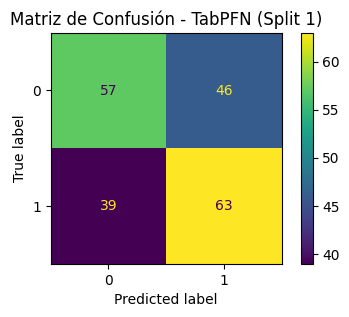

Puntuación F1 (Weighted): 0.5850
Precisión (Weighted): 0.5859
Recall (Weighted): 0.5854



/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Split 2 - TabPFN:

Matriz de Confusión: 



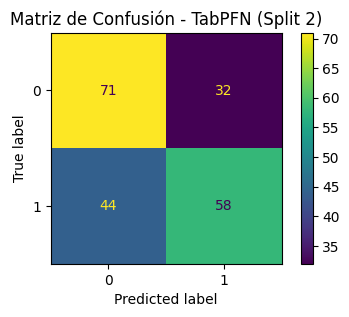

Puntuación F1 (Weighted): 0.6279
Precisión (Weighted): 0.6309
Recall (Weighted): 0.6293



/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Split 3 - TabPFN:

Matriz de Confusión: 



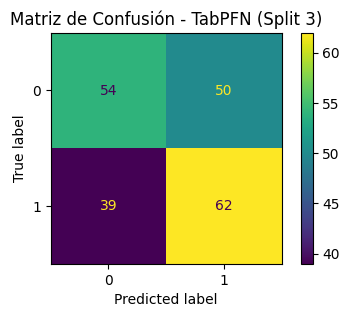

Puntuación F1 (Weighted): 0.5649
Precisión (Weighted): 0.5673
Recall (Weighted): 0.5659



/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Split 4 - TabPFN:

Matriz de Confusión: 



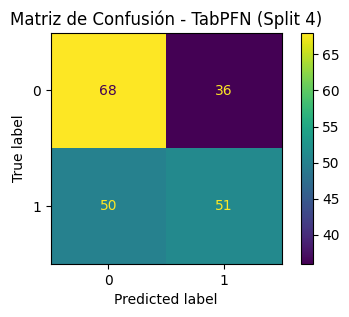

Puntuación F1 (Weighted): 0.5781
Precisión (Weighted): 0.5812
Recall (Weighted): 0.5805



/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Split 5 - TabPFN:

Matriz de Confusión: 



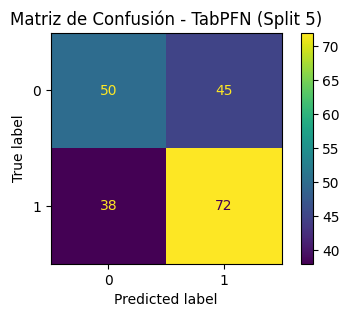

Puntuación F1 (Weighted): 0.5936
Precisión (Weighted): 0.5935
Recall (Weighted): 0.5951

Resultados generales para TabPFN:

Puntuación F1 Media: 0.5899
Desviación Estándar de F1: 0.0212
Precisión Media: 0.5917
Desviación Estándar de Precisión: 0.0213
Recall Medio: 0.5912
Desviación Estándar de Recall: 0.0212

SVD Dataframe 

Evaluación del Modelo:



/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Split 1 - TabPFN:

Matriz de Confusión: 



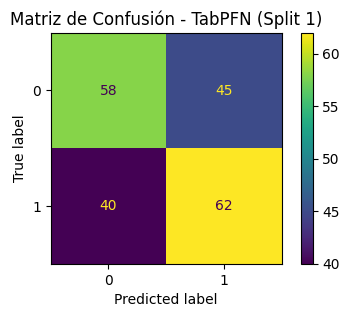

Puntuación F1 (Weighted): 0.5852
Precisión (Weighted): 0.5857
Recall (Weighted): 0.5854



/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Split 2 - TabPFN:

Matriz de Confusión: 



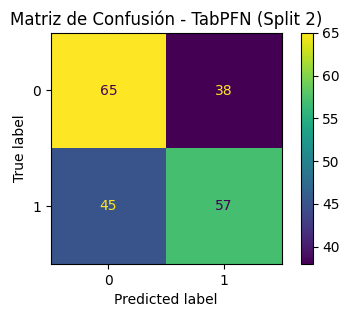

Puntuación F1 (Weighted): 0.5946
Precisión (Weighted): 0.5954
Recall (Weighted): 0.5951



/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Split 3 - TabPFN:

Matriz de Confusión: 



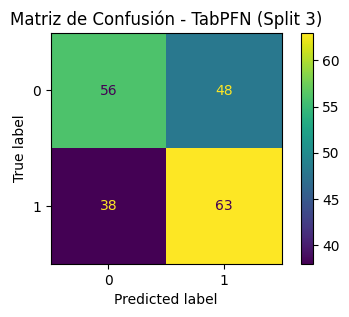

Puntuación F1 (Weighted): 0.5798
Precisión (Weighted): 0.5819
Recall (Weighted): 0.5805



/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Split 4 - TabPFN:

Matriz de Confusión: 



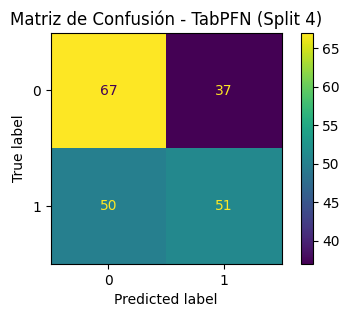

Puntuación F1 (Weighted): 0.5735
Precisión (Weighted): 0.5760
Recall (Weighted): 0.5756



/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Split 5 - TabPFN:

Matriz de Confusión: 



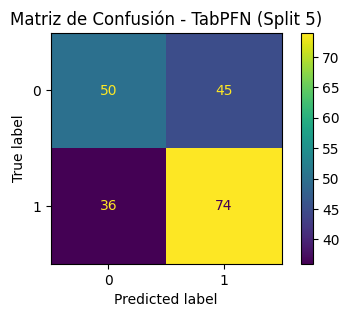

Puntuación F1 (Weighted): 0.6028
Precisión (Weighted): 0.6031
Recall (Weighted): 0.6049

Resultados generales para TabPFN:

Puntuación F1 Media: 0.5872
Desviación Estándar de F1: 0.0104
Precisión Media: 0.5884
Desviación Estándar de Precisión: 0.0097
Recall Medio: 0.5883
Desviación Estándar de Recall: 0.0105



In [ ]:
#evaluate_models_tabpfn(df_bag_of_words, 'label')
print("PCA Dataframe \n")
df_undersampled_pca = undersample_balance(df_pca, 'label', 1024)
evaluate_models_tabpfn(df_undersampled_pca, 'label')
print("SVD Dataframe \n")
df_undersampled_svd = undersample_balance(df_svd, 'label', 1024)
evaluate_models_tabpfn(df_undersampled_svd, 'label')

### Transtab

Transtab es una técnica de aprendizaje profundo que emplea una arquitectura de transformers diseñada para trabajar con datos tabulares, lo que le permite capturar y modelar las relaciones entre características categóricas, numéricas y binarias presentes en los datos tabulares. La técnica incluye el uso de modelos preentrenados, facilitando la integración y adaptación a diferentes tipos de datos tabulares.

Debido a un error del entorno de ejecución del notebook, el entorno no reconoce que dispongo de una gráfica Nvidia para ejecutar el código, al no poder cumplir este requisito no ha sido posible evaluar el rendimiento de la técnica Transtab.

In [ ]:
import os

# Instalar transtab si no está ya instalado
!pip install transtab

import transtab
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

def evaluate_models_transtab(dataframe, target):
    # Verificar si el DataFrame contiene la columna objetivo
    if target not in dataframe.columns:
        raise ValueError(f"La columna objetivo '{target}' no se encuentra en el DataFrame")

    print("Evaluación del Modelo:\n")

    # Eliminar la columna objetivo del DataFrame
    features = dataframe.drop(columns=[target])
    labels = dataframe[target]

    # Usar una semilla para la reproducibilidad
    seed = 42

    # Realizar 5 particiones train-test
    n_splits = 5
    holdout_results = {'TransTab': []}  # Almacenar resultados

    for split in range(n_splits):
        # Crear particiones de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=seed + split)

        # Cargar el modelo preentrenado transtab
        model = transtab.build_classifier(checkpoint='./ckpt')

        # Convertir columnas categóricas, numéricas y binarias
        cat_cols = list(X_train.select_dtypes(include=['object']).columns)
        num_cols = list(X_train.select_dtypes(include=['float64', 'int64']).columns)
        bin_cols = list(X_train.select_dtypes(include(['bool']).columns))

        # Actualizar columnas en el modelo
        model.update({'cat': cat_cols, 'num': num_cols, 'bin': bin_cols})

        # Entrenar el modelo con los datos de entrenamiento
        trainset = transtab.convert_dataframe_to_transdata(X_train, y_train)
        valset = transtab.convert_dataframe_to_transdata(X_test, y_test)
        transtab.train(model, trainset, valset)  # Eliminar especificación de CPU

        # Hacer predicciones con el modelo entrenado
        y_pred = transtab.predict(model, valset)  # Eliminar especificación de CPU

        # Calcular la exactitud
        accuracy = accuracy_score(y_test, y_pred)

        # Imprimir métricas de evaluación
        print(f"Split {split + 1} - TransTab:\n")
        print(f"Exactitud: {accuracy:.4f}\n")

        # Guardar resultados
        holdout_results['TransTab'].append({
            'accuracy': accuracy
        })

    # Resumen de resultados
    print(f"Resultados generales para TransTab:\n")
    accuracies = [result['accuracy'] for result in holdout_results['TransTab']]
    print(f"Exactitud Media: {np.mean(accuracies):.4f}")
    print(f"Desviación Estándar de Exactitud: {np.std(accuracies):.4f}\n")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 8.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.5 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158699 sha256=7a005f0d654e0b955bddb6f527531c828729dc9cfb677fa0fd6944b34f6dffba
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=6f6dac122904763dc59edd1052f31ed6982347d8424e4739879be71cc255e763
  Stored in directory: /root/.cache/pip/wheel

In [ ]:
#evaluate_models_tabpfn(df_bag_of_words, 'label')
print("PCA Dataframe \n")
evaluate_models_transtab(df_pca, 'label')
print("SVD Dataframe \n")
evaluate_models_transtab(df_svd, 'label')

2024-05-27 20:17:23.415 | WARNING  | transtab.modeling_transtab:_check_column_overlap:254 - No cat/num/bin cols specified, will take ALL columns as categorical! Ignore this warning if you specify the `checkpoint` to load the model.


PCA Dataframe 

Evaluación del Modelo:



RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

# Interpretabilidad de modelos

La interpretabilidad de los modelos de IA se refiere a la capacidad de entender y explicar cómo un modelo genera sus predicciones, esto implica conocer el funcionamiento interno del modelo para que pueda ser comprensible para las personas, permitiendo identificar que características o variables influyen con un mayor en la toma de decisiones del modelo. Además aporta confianza en el modelo, puesto que los usuarios pueden entender y validar el proceso de toma de decisiones. Permite detectar posibles sesgos y errores en el modelo, lo cual aporta información para mejorar el rendimiento del modelo.

Sin embargo, las técnicas de interpretabilidad pueden resultar inútiles cuando se aplican a modelos entrenados con un dataframe producto de una reducción de dimensionalidad. Las técnicas de reducción de dimensionalidad combinan las características originales en nuevas variables que pueden ser combinaciones lineales o no lineales de las mismas, por lo que encontrar qué nuevas variables tienen mayor peso no tiene porque tener un significado directo que se pueda interpretar fácilmente respecto a las variables originales. Debido a ello no tiene mucho sentido aplicar técnicas de interpretabilidad de modelos cuando están siendo entrenados con dataframes fruto de aplicar las técnicas PCA y tSVD.


# Conclusión

A lo largo de este notebook se han llevado a cabo todas las etapas necesarias para la construcción de un modelo predictivo de IA con la capacidad de evaluar si un texto de entrada puede revelar la presencia de problemas de salud mental en su autor.

En primer lugar, mediante el análisis exploratorio de datos fue posible apreciar las características y encontrar las particularidades del conjunto de datos con el que se entrenará el modelo.

Seguidamente se aplicaron técnicas de limpieza con las que eliminar todas aquellas variables y elementos del texto que pudiesen suponer una dificultad para que el modelo aprendiese las distribuciones y detalles de los datos de entrenamiento. Un aspecto que hubiese querido implementar es la eliminación de todas las palabras que no pertenezcan al diccionario inglés, es decir, palabras cque no tienen un significado real y que pueden ser simples expresiones u onomatopeyas como "aaaaa", pero debido al alto volumen de datos las técnicas basadas en diccionarios no alcanzaban a evaluar el conjunto completo en un tiempo viable.

Una vez abordadas estas características innecesarias, se utilizaron técnicas de procesamiento de lenguaje natural sobre el texto remanente, de modo que se encontrase en las mejores condiciones para ser evaluado por los algoritmos de IA, para terminar con este punto se empleó la técnica Bag of Words para obtener una nueva matriz en la que cada palabra única supone una nueva columna.

Debido a la altísima dimensionalidad que presentaba la matriz Bag of Words, fue necesario el uso de técnicas de reducción de dimensionalidad, con este fin se seleccionaron PCA y tSVD, lo cual permitió obtener dos versiones distintas de la matriz pero con una dimensionalidad reducida a 100 variables.

Con los datos preprocesados se alcanzó la etapa de entrenamiento de modelos, en la cual se aplicaron algoritmos pertenecientes a diversos campos del aprendizaje automático, para todos ellos se realizaron 5 particiones de los conjuntos de datos de entrada con el propósito de verificar su capacidad de generalización ante distintas muestras, y se mostraron los resultados promedios obtenidos en dichas particiones. Respecto a la evaluación se aplicaron las métricas F1 Score, Precission y Recall, además de la visualización de la matriz de confusión para observar de un modo directo los aciertos y errores obtenidos en las predicciones.

Por último solo queda reflejar en estas conclusiones la evaluación del rendimiento obtenido en los distintos algoritmos de peor a mejor:

* TabPFN ha sido el que peores métricas ha cosechado, obteniendo entorno a un 0.58 en todas ellas para ambos dataframes, esto puede deberse al hecho de su limitado tamaño de datos de entrado, con solo 1024 muestras no puede alcanzar un mayor grado de exactitud en sus predicciones.

* Los algoritmos tradicionales han obtenido unas métricas entre 0.63 y 0.65, siendo este el orden de peor a mejor: DecisionTree(0.63), SVC(0.6506) y KNeighbours(0.6530), como se puede apreciar no existe una gran diferencia entre el rendimiento de los distintos algoritmos, por lo que no merece la pena dedicar un excesivo tiempo a evaluar con detenimiento las distintas opciones que nos ofrece este campo. Sin embargo en el caso de SVC si cabe destacar que el tiempo de entrenamiento que requirió para poder ejecutarse fue varios órdenes mayor que el de los otros algoritmos.

* Red neuronal: a pesar de haberse ejecutado solo a través de dos épocas por cuestiones de tiempo de ejecución, la red neuronal obtuvo los mejores resultados con un valor final de 0.75, sus valores mejoraron drásticamente en el paso de época, por lo que cabe pensar que si se ejecutase a lo largo de un número mayor de épocas podrían incluso alcanzarse unos resultados de un mayor grado de excelencia.

